In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set_context("notebook")
sns.set(style="whitegrid")

# 2014 expenditure the US spent on foreign aid. 
# Found here: https://explorer.usaid.gov/query
aid = pd.read_csv("data/us_aid.csv")
aid = aid[aid.constant_amount > 0]
aid = aid[aid.current_amount > 0]

for attribute in aid:
    print attribute

id
country_id
country_code
country_name
region_id
region_name
income_group_id
income_group_name
income_group_acronym
implementing_agency_id
implementing_agency_acronym
implementing_agency_name
implementing_subagency_id
subagency_acronym
subagency_name
channel_category_id
channel_category_name
channel_subcategory_name
channel_subcategory_id
channel_id
channel_name
dac_category_id
dac_category_name
dac_sector_code
dac_sector_name
dac_purpose_code
dac_purpose_name
funding_account_id
funding_account_name
assistance_category_id
assistance_category_name
activity_id
activity_name
activity_project_number
activity_start_date
activity_end_date
transaction_type_id
transaction_type_name
fiscal_year
current_amount
constant_amount
funding_agency_id
funding_agency_name
funding_agency_acronym
aid_type_group_id
aid_type_group_name


In [80]:
# Let's look at the development assistance committee categories
categories = aid['dac_category_name'].unique()

In [225]:
def total_costs(dataframe, region_label, cost_label):
    costs = {}
    for index,row in dataframe.iterrows():
        region = row[region_label]
        cost = row[cost_label]
        if cost >= 0:
            if region in costs:
                costs[region] += cost
            else:
                costs[region] = cost
    return costs

def costs_of(category, region_label, cost_label):
    aid_category = aid[aid.dac_category_name == category]
    return total_costs(aid_category, region_label, cost_label)

def dict_to_df(dictionary, cols):
    return pd.DataFrame(dictionary.items(), columns=cols)

totals = total_costs(aid, 'dac_category_name', 'constant_amount')
totals_df = dict_to_df(totals, ['Category', 'Cost'])
totals_df

,Category,Cost
0,Economic Growth,788511745
1,Commodity Assistance,342401778
2,Infrastructure,755349628
3,Health and Population,9860578047
4,Humanitarian,6194629955
5,Governance,3239981797
6,Other,5975251790
7,Education,1115743037
8,Agriculture,1256992748


In [227]:
totals_df.to_csv('data/totals.csv')

In [234]:
country_costs = {}
for category in categories:
    country_costs[category] = costs_of(category, 'country_name', 'constant_amount')
    
country_costs_df = pd.DataFrame.from_dict(country_costs)
country_costs_df.index.name = 'Country'
country_costs_df = country_costs_df.reset_index(level=0)

regions = {}
for index,row in aid.iterrows():
    region = row['region_name']
    country = row['country_name']
    regions[country] = region

country_costs_df['Region'] = country_costs_df['Country']
country_costs_df['Region'] = country_costs_df['Region'].replace(regions)
country_costs_df 


,Country,Agriculture,Commodity Assistance,Economic Growth,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region
0,Afghanistan,94599568,NaN,104734655,158674484,524438584,113081091,182282027,284242624,168147907,South and Central Asia
1,Albania,NaN,NaN,2677744,487442,11305099,460688,NaN,NaN,4638485,Europe and Eurasia
2,Algeria,NaN,NaN,NaN,NaN,93393,NaN,9266192,492625,NaN,Middle East and North Africa
3,Angola,NaN,NaN,714002,24631,1506298,34837724,5399578,NaN,5620055,Sub-Saharan Africa
4,Argentina,338659,NaN,317964,NaN,NaN,NaN,NaN,NaN,226095,Western Hemisphere
5,Armenia,NaN,147690,8047686,1476705,13567330,5499545,221577,NaN,4751180,Europe and Eurasia
6,Asia Region,758208,NaN,3029778,1310401,2233127,29637858,461826,NaN,113417704,World
7,Azerbaijan,NaN,NaN,3885086,1411655,5566036,NaN,NaN,NaN,3873570,Europe and Eurasia
8,Bahrain,NaN,NaN,NaN,NaN,849316,NaN,NaN,NaN,NaN,Middle East and North Africa
9,Bangladesh,31475585,27243662,1010182,4301134,12668073,101870398,5599341,2101,34606563,South and Central Asia


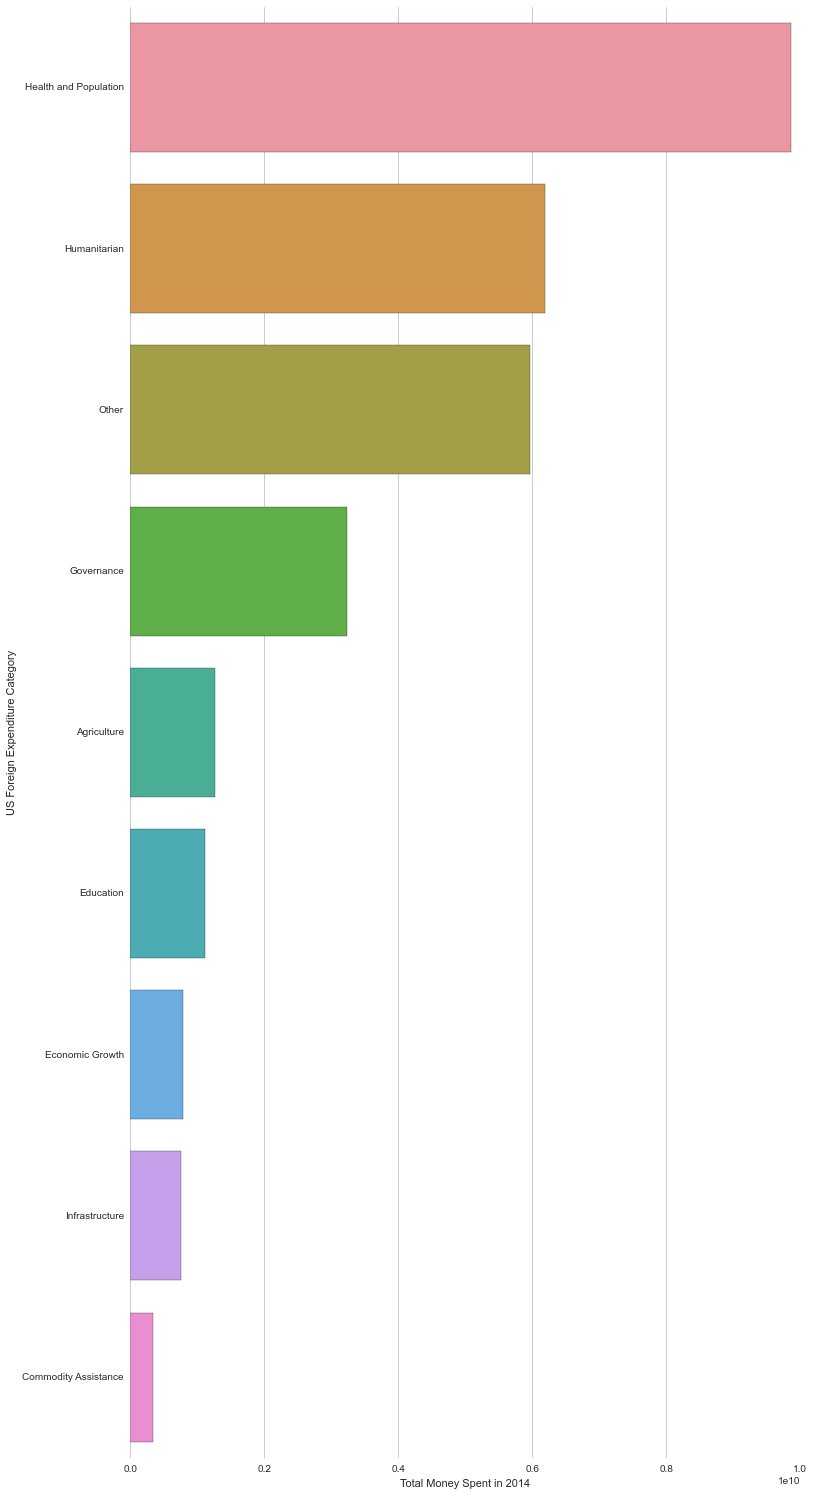

In [235]:
def plot_costs(costs, x, y, xlabel, ylabel):
    plt.figure(figsize=(12, 26))
    cost_plot = sns.barplot(data=costs.sort(x, ascending=False), x=x, y=y)
    cost_plot.set(xlabel=xlabel, ylabel=ylabel)
    sns.despine(left=True, bottom=True)


plot_costs(totals_df, 'Cost', 'Category', 'Total Money Spent in 2014', 'US Foreign Expenditure Category')

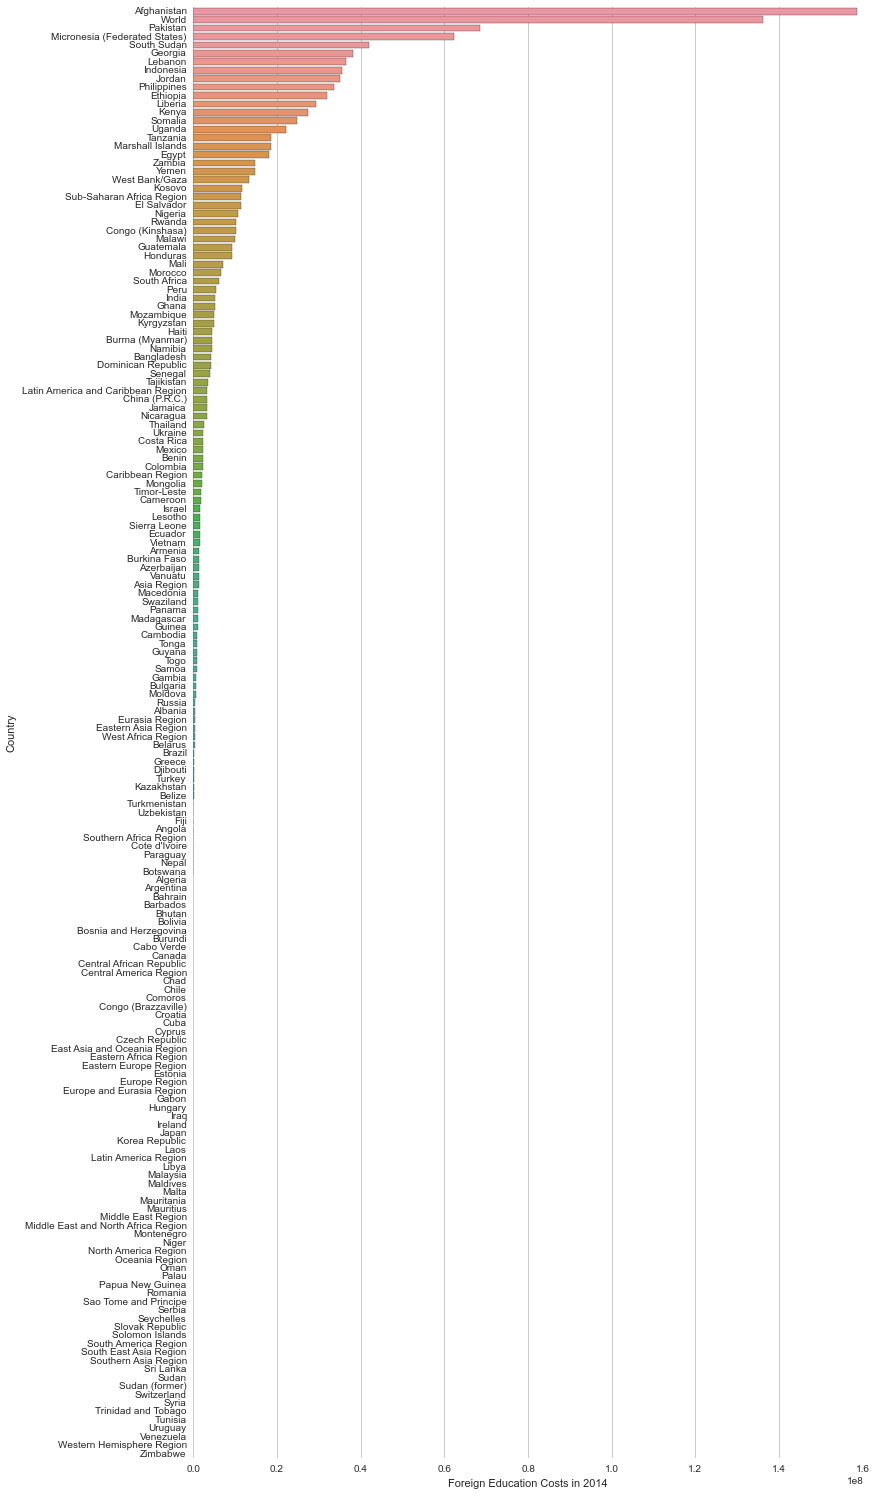

In [201]:
plot_costs(country_costs_df, 'Education', 'Country', 'Foreign Education Costs in 2014', 'Country')


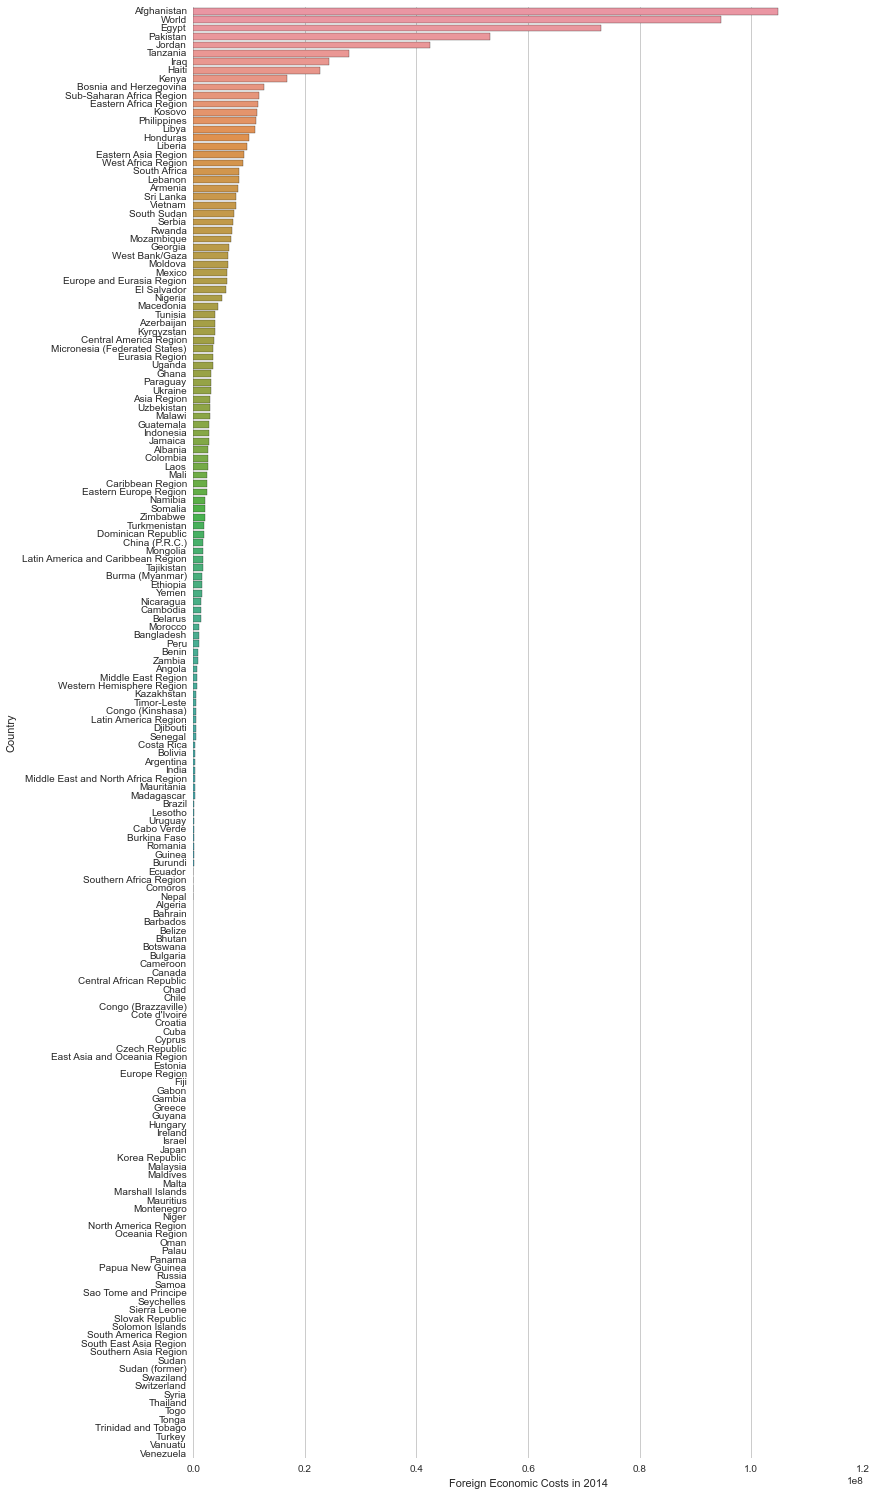

In [202]:
plot_costs(country_costs_df, 'Economic Growth', 'Country', 'Foreign Economic Costs in 2014', 'Country')

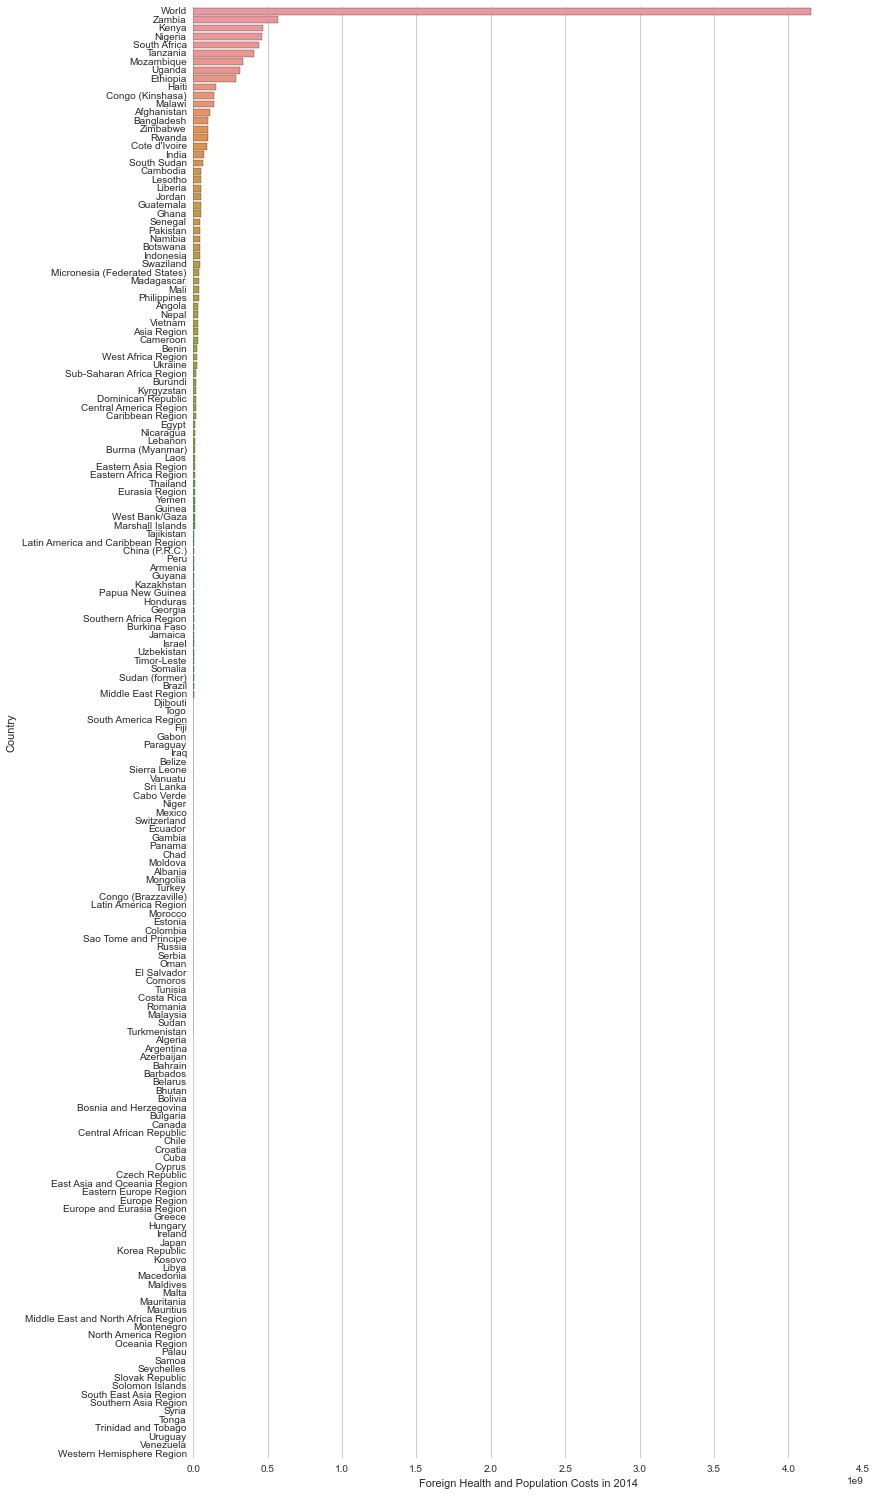

In [203]:
plot_costs(country_costs_df, 'Health and Population', 'Country', 'Foreign Health and Population Costs in 2014', 'Country')

In [237]:
hdi = pd.read_csv("data/HDI.csv")
hdi = hdi.drop(range(196,204))
foreign_aid = pd.merge(hdi,country_costs_df, on='Country', how='outer')
#foreign_aid['Education'] = foreign_aid['Education'].fillna(0)
#foreign_aid['Health and Population'] = foreign_aid['Health and Population'].fillna(0)
#foreign_aid['Economic Growth'] = foreign_aid['Economic Growth'].fillna(0)
foreign_aid.to_csv('merged_aid.csv')
foreign_aid['Health and Population (log)'] = foreign_aid['Health and Population'].apply(np.log)
foreign_aid['Education (log)'] = foreign_aid['Education'].apply(np.log)
foreign_aid['Economic Growth (log)'] = foreign_aid['Economic Growth'].apply(np.log)
foreign_aid.sort('Education')




,HDI rank,Country,2013 HDI Value,2013 Life Expectancy at Birth (years),2013 Life Expectancy at Birth (years) Note,2012 Mean years of schooling,2012 Mean years of schooling Note,2012 Expected years of schooling,2012 Expected years of schooling Note,2013 Gross national income (GNI) per capita (2011 PPP $),...,Education,Governance,Health and Population,Humanitarian,Infrastructure,Other,Region,Health and Population (log),Education (log),Economic Growth (log)
108,109,Botswana,0.683,64.4,v,8.8,NaN,11.7,NaN,14792,...,3311,198873,46614274,24631,NaN,291122,Sub-Saharan Africa,17.657417,8.105006,NaN
144,145,Nepal,0.540,68.4,NaN,3.2,NaN,12.4,NaN,2194,...,15129,7397806,34386515,11444241,NaN,22590386,South and Central Asia,17.353175,9.624369,8.349721
110,111,Paraguay,0.676,72.3,NaN,7.7,NaN,11.9,NaN,7580,...,17089,8618314,1140452,504425,NaN,4532143,Western Hemisphere,13.946935,9.746190,14.954146
205,NaN,Cote d'Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20389,12279751,90492207,8778491,NaN,2347493,Sub-Saharan Africa,18.320774,9.922751,NaN
229,NaN,Southern Africa Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23954,3331832,4312347,7879230,NaN,12270400,Sub-Saharan Africa,15.276993,10.083891,9.455950
148,149,Angola,0.526,51.9,NaN,4.7,w,11.4,NaN,6323,...,24631,1506298,34837724,5399578,NaN,5620055,Sub-Saharan Africa,17.366211,10.111761,13.478641
87,88,Fiji,0.724,69.8,NaN,9.9,NaN,15.7,NaN,7214,...,46322,492625,1315053,NaN,NaN,741986,East Asia and Oceania,14.089388,10.743372,NaN
104,103,Turkmenistan,0.698,65.5,NaN,9.9,s,12.6,p,11533,...,49262,1869060,754,NaN,218699,1058147,South and Central Asia,6.625392,10.804908,14.473487
115,116,Uzbekistan,0.661,68.2,NaN,10.0,r,11.5,NaN,5227,...,49262,2871251,2931227,NaN,NaN,1237397,South and Central Asia,14.890932,10.804908,14.905287
83,84,Belize,0.732,73.9,NaN,9.3,NaN,13.7,NaN,9364,...,86567,69084,1022373,NaN,NaN,236328,Western Hemisphere,13.837637,11.368674,NaN


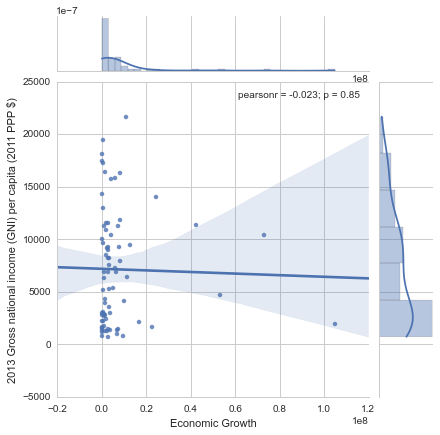

In [224]:
sns.jointplot(kind='reg',x="Economic Growth", y="2013 Gross national income (GNI) per capita (2011 PPP $)", data=foreign_aid)

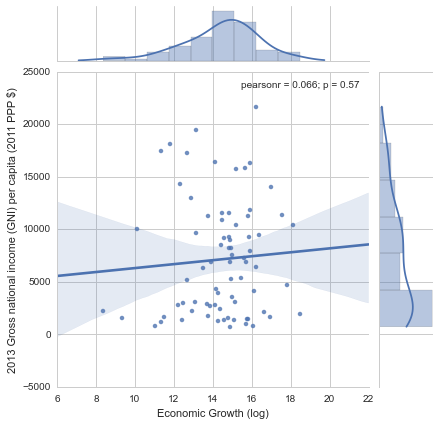

In [218]:
sns.jointplot(kind='reg',x="Economic Growth (log)", y="2013 Gross national income (GNI) per capita (2011 PPP $)", data=foreign_aid)

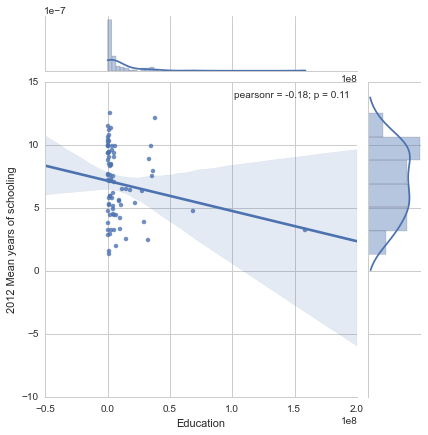

In [213]:
sns.jointplot(kind='reg', x="Education", y="2012 Mean years of schooling", data=foreign_aid)

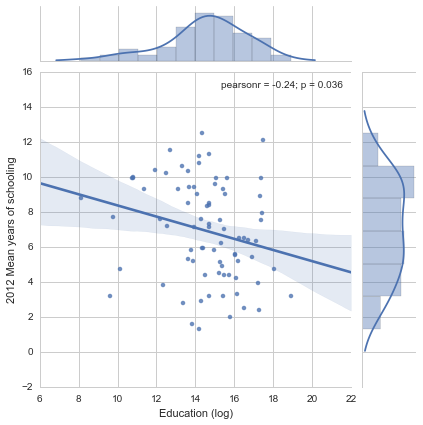

In [219]:
sns.jointplot(kind='reg', x="Education (log)", y="2012 Mean years of schooling", data=foreign_aid)

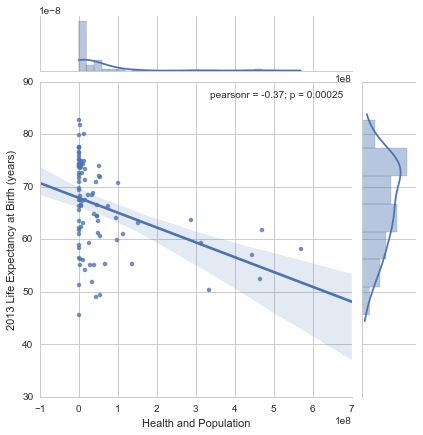

In [220]:
sns.jointplot(kind='reg',x="Health and Population", y="2013 Life Expectancy at Birth (years)", data=foreign_aid)

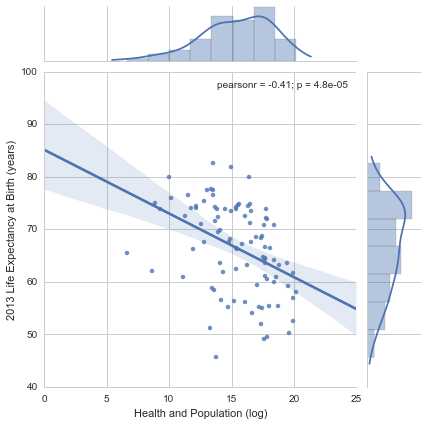

In [221]:
sns.jointplot(kind='reg',x="Health and Population (log)", y="2013 Life Expectancy at Birth (years)", data=foreign_aid)